<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Loading-data-from-all-CSVs-into-1-big-DF" data-toc-modified-id="Loading-data-from-all-CSVs-into-1-big-DF-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading data from all CSVs into 1 big DF</a></span></li><li><span><a href="#Data-Pre-Processing" data-toc-modified-id="Data-Pre-Processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Pre-Processing</a></span><ul class="toc-item"><li><span><a href="#Drop-NaN-Values" data-toc-modified-id="Drop-NaN-Values-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Drop NaN Values</a></span></li><li><span><a href="#Change-Data-Types" data-toc-modified-id="Change-Data-Types-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Change Data Types</a></span></li></ul></li><li><span><a href="#Best-Month-for-Sales" data-toc-modified-id="Best-Month-for-Sales-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Best Month for Sales</a></span></li><li><span><a href="#Best-City-for-Sales" data-toc-modified-id="Best-City-for-Sales-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Best City for Sales</a></span></li><li><span><a href="#Hourly-Analysis" data-toc-modified-id="Hourly-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Hourly Analysis</a></span></li><li><span><a href="#Products-sold-together" data-toc-modified-id="Products-sold-together-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Products sold together</a></span></li><li><span><a href="#Product-sold-most-and-why" data-toc-modified-id="Product-sold-most-and-why-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Product sold most and why</a></span></li></ul></div>

# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading data from all CSVs into 1 big DF

In [2]:
#Using .\ as my data is in the same folder as my notebook. If your data is in a different folder, define the whole path
df = pd.read_csv(".\Sales_Data\Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
#Found this snippet on StackOverflow - Just changed the path
import glob

path = r'.\Sales_Data'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [4]:
frame.head()
#Data from April CSV is loaded

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
frame.tail()
#Data from September CSV is loaded

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [6]:
frame.to_csv("AllMonthsData.csv", index = False)

In [7]:
all_data = frame
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

# Data Pre-Processing

## Drop NaN Values

In [8]:
all_data.dropna(axis = 0, how = 'any', inplace = True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


I have removed any rows having any NaN values but if, for awareness, you want to see what rows have NaN values, you can use https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html

In [9]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

## Change Data Types

In [10]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

<ipython-input-10-40e2c8893c1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [11]:
all_data['month'] = all_data['Order Date'].dt.month

<ipython-input-11-55c222273310>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['month'] = all_data['Order Date'].dt.month


In [12]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [13]:
to_num = ['Quantity Ordered','Price Each']
all_data[to_num] = all_data[to_num].apply(pd.to_numeric, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [14]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
month                        int64
dtype: object

In [15]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

<ipython-input-15-249120f4cbc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


# Best Month for Sales

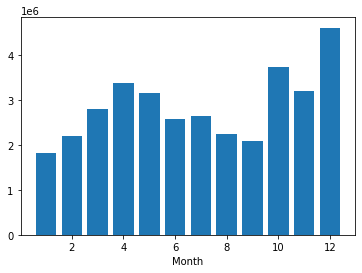

In [16]:
df2 = all_data.groupby('month')['Sales'].sum().reset_index()
months = range(1,13)

plt.bar(months, df2['Sales'])
plt.xlabel('Month')
plt.show()



#We see that December was the best month for sales

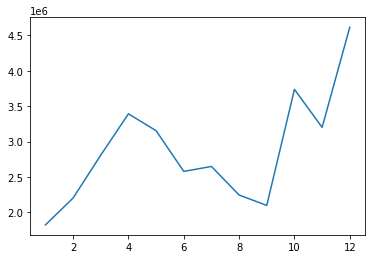

In [17]:
fig, ax = plt.subplots()
ax.plot(months, df2['Sales'])
ax.ticklabel_format(useOffset=False)
plt.show()


# Best City for Sales

In [18]:
all_data['City'] = [x.split(',')[1] + ' (' + x.split(',')[2].split(' ')[1] + ')' for x in all_data['Purchase Address']]

<ipython-input-18-e96176e232c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City'] = [x.split(',')[1] + ' (' + x.split(',')[2].split(' ')[1] + ')' for x in all_data['Purchase Address']]


In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [20]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
month                        int64
Sales                      float64
City                        object
dtype: object

<BarContainer object of 10 artists>

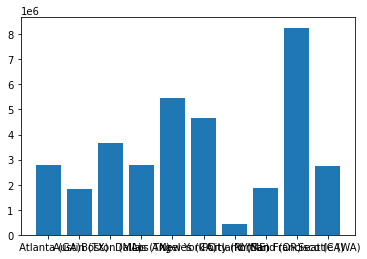

In [21]:
df_city = all_data.groupby('City')['Sales'].sum().reset_index()
# df_quantity = all_data.groupby('City')['Quantity Ordered'].sum().reset_index()
plt.bar(df_city['City'], df_city['Sales'])
# plt.plot(df_quantity['City'], df_quantity['Quantity Ordered'], color='green')
# plt.xticks(rotation = 270)


,City,Sales
0,Atlanta (GA),2.795499e+06
1,Austin (TX),1.819582e+06
2,Boston (MA),3.661642e+06
3,Dallas (TX),2.767975e+06
4,Los Angeles (CA),5.452571e+06


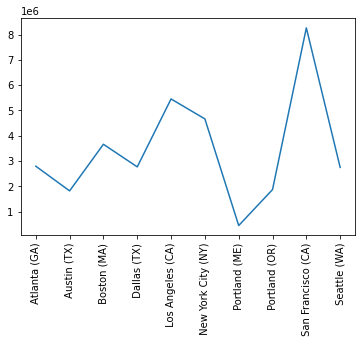

In [22]:
df_city = all_data.groupby('City')['Sales'].sum().reset_index()
plt.plot(df_city['City'], df_city['Sales'])
plt.xticks(rotation = 90)
df_city.head()

<BarContainer object of 10 artists>

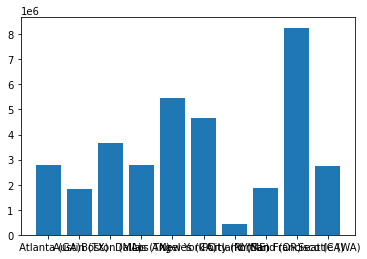

In [23]:
df_city = all_data.groupby('City')['Sales'].sum().reset_index()
# df_quantity = all_data.groupby('City')['Quantity Ordered'].sum().reset_index()
plt.bar(df_city['City'], df_city['Sales'])

# Hourly Analysis

In [24]:
all_data['hour'] = all_data['Order Date'].dt.hour

<ipython-input-24-aa457f906843>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['hour'] = all_data['Order Date'].dt.hour


In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [26]:
results_hour = all_data.groupby('hour').sum().reset_index()
results_hour.sort_values('Sales', ascending = False)

#1900/7pm is the best time to advertise - for max REVENUE     

,hour,Quantity Ordered,Price Each,month,Sales
19,19,14470.0,2398588.31,91389,2412938.54
12,12,14202.0,2299876.68,89161,2316821.34
11,11,14005.0,2288855.18,87654,2300610.24
20,20,13768.0,2268185.16,86375,2281716.24
18,18,13802.0,2207696.93,86421,2219348.30
13,13,13685.0,2139743.86,85808,2155389.80
17,17,12229.0,2116777.02,77454,2129361.61
14,14,12362.0,2072194.77,77836,2083672.73
21,21,12244.0,2030763.83,77103,2042000.86
10,10,12308.0,1932665.62,76928,1944286.77


In [27]:
results_hour.sort_values('Quantity Ordered', ascending = False)

#1900/7pm - best time for max NUMBER of products sold as well 

,hour,Quantity Ordered,Price Each,month,Sales
19,19,14470.0,2398588.31,91389,2412938.54
12,12,14202.0,2299876.68,89161,2316821.34
11,11,14005.0,2288855.18,87654,2300610.24
18,18,13802.0,2207696.93,86421,2219348.30
20,20,13768.0,2268185.16,86375,2281716.24
13,13,13685.0,2139743.86,85808,2155389.80
14,14,12362.0,2072194.77,77836,2083672.73
10,10,12308.0,1932665.62,76928,1944286.77
21,21,12244.0,2030763.83,77103,2042000.86
17,17,12229.0,2116777.02,77454,2129361.61


([<matplotlib.axis.XTick at 0x26dcd0aef70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

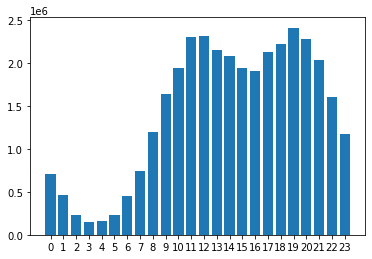

In [28]:
plt.bar(results_hour['hour'], results_hour['Sales'] )
plt.xticks(results_hour['hour'])

([<matplotlib.axis.XTick at 0x26dcd15f850>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

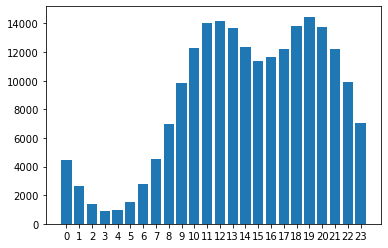

In [29]:
plt.bar(results_hour['hour'], results_hour['Quantity Ordered'] )
plt.xticks(results_hour['hour'])

In [97]:
#Most number of customers by hour 
customers_hour = all_data.groupby('hour')['Order ID'].nunique().reset_index()
customers_hour.rename(columns = {'Order ID': 'Number of Unique Orders/Customers'}, inplace = True)
customers_hour.sort_values('Number of Unique Orders/Customers', ascending = False, inplace = True)
customers_hour.head(25)

,hour,Number of Unique Orders/Customers
19,19,12377
12,12,12082
11,11,11882
20,20,11763
18,18,11761
13,13,11682
14,14,10522
21,21,10499
10,10,10492
17,17,10476


# Products sold together 
1. Remove rows with unique order IDs as we only want rows that have >=2 same order IDs
2. Create dictionary 

In [31]:
df_together = all_data[all_data['Order ID'].duplicated(keep=False)]
df_together.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,hour
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11


In [32]:
df_together['grouped'] = df_together.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_together.head()

<ipython-input-32-28670abab248>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_together['grouped'] = df_together.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,hour,grouped
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [33]:
df_together.drop_duplicates(subset = ['Order ID', 'grouped'], keep = 'first', inplace = True)

<ipython-input-33-5b8b889b624f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_together.drop_duplicates(subset = ['Order ID', 'grouped'], keep = 'first', inplace = True)


In [34]:
df_together = df_together[['Order ID','grouped']]
df_together.head()

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [35]:
print(df_together['grouped'].nunique())

366


In [36]:
df1 = df_together.groupby(['grouped']).size().reset_index().rename(columns={0:'count'})

In [37]:
df1.sort_values(by=['count'], ascending = False, inplace = True)
df1.head()

,grouped,count
342,"iPhone,Lightning Charging Cable",882
173,"Google Phone,USB-C Charging Cable",856
363,"iPhone,Wired Headphones",361
299,"Vareebadd Phone,USB-C Charging Cable",312
191,"Google Phone,Wired Headphones",303


In [38]:
#Top 10 most sold together products - 
df1[:10].rename(columns={'grouped':'Products'})

,Products,count
342,"iPhone,Lightning Charging Cable",882
173,"Google Phone,USB-C Charging Cable",856
363,"iPhone,Wired Headphones",361
299,"Vareebadd Phone,USB-C Charging Cable",312
191,"Google Phone,Wired Headphones",303
334,"iPhone,Apple Airpods Headphones",286
163,"Google Phone,Bose SoundSport Headphones",161
305,"Vareebadd Phone,Wired Headphones",104
184,"Google Phone,USB-C Charging Cable,Wired Headph...",77
292,"Vareebadd Phone,Bose SoundSport Headphones",60


In [50]:
df_val = pd.DataFrame(df_together['grouped'].value_counts())
df_val.head()

,grouped
"iPhone,Lightning Charging Cable",882
"Google Phone,USB-C Charging Cable",856
"iPhone,Wired Headphones",361
"Vareebadd Phone,USB-C Charging Cable",312
"Google Phone,Wired Headphones",303


In [53]:
df_val['Percentage'] = df_val['grouped'].transform(lambda x: x / x.sum())
df_val.head()

,grouped,Percentage
"iPhone,Lightning Charging Cable",882,0.123599
"Google Phone,USB-C Charging Cable",856,0.119955
"iPhone,Wired Headphones",361,0.050589
"Vareebadd Phone,USB-C Charging Cable",312,0.043722
"Google Phone,Wired Headphones",303,0.042461


# Product sold most and why

In [74]:
product_group = all_data.groupby('Product')
products = [product for product, df in product_group]

In [59]:
df_prod = all_data.groupby('Product')['Quantity Ordered'].sum().reset_index()
df_prod.head()

,Product,Quantity Ordered
0,20in Monitor,4129.0
1,27in 4K Gaming Monitor,6244.0
2,27in FHD Monitor,7550.0
3,34in Ultrawide Monitor,6199.0
4,AA Batteries (4-pack),27635.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

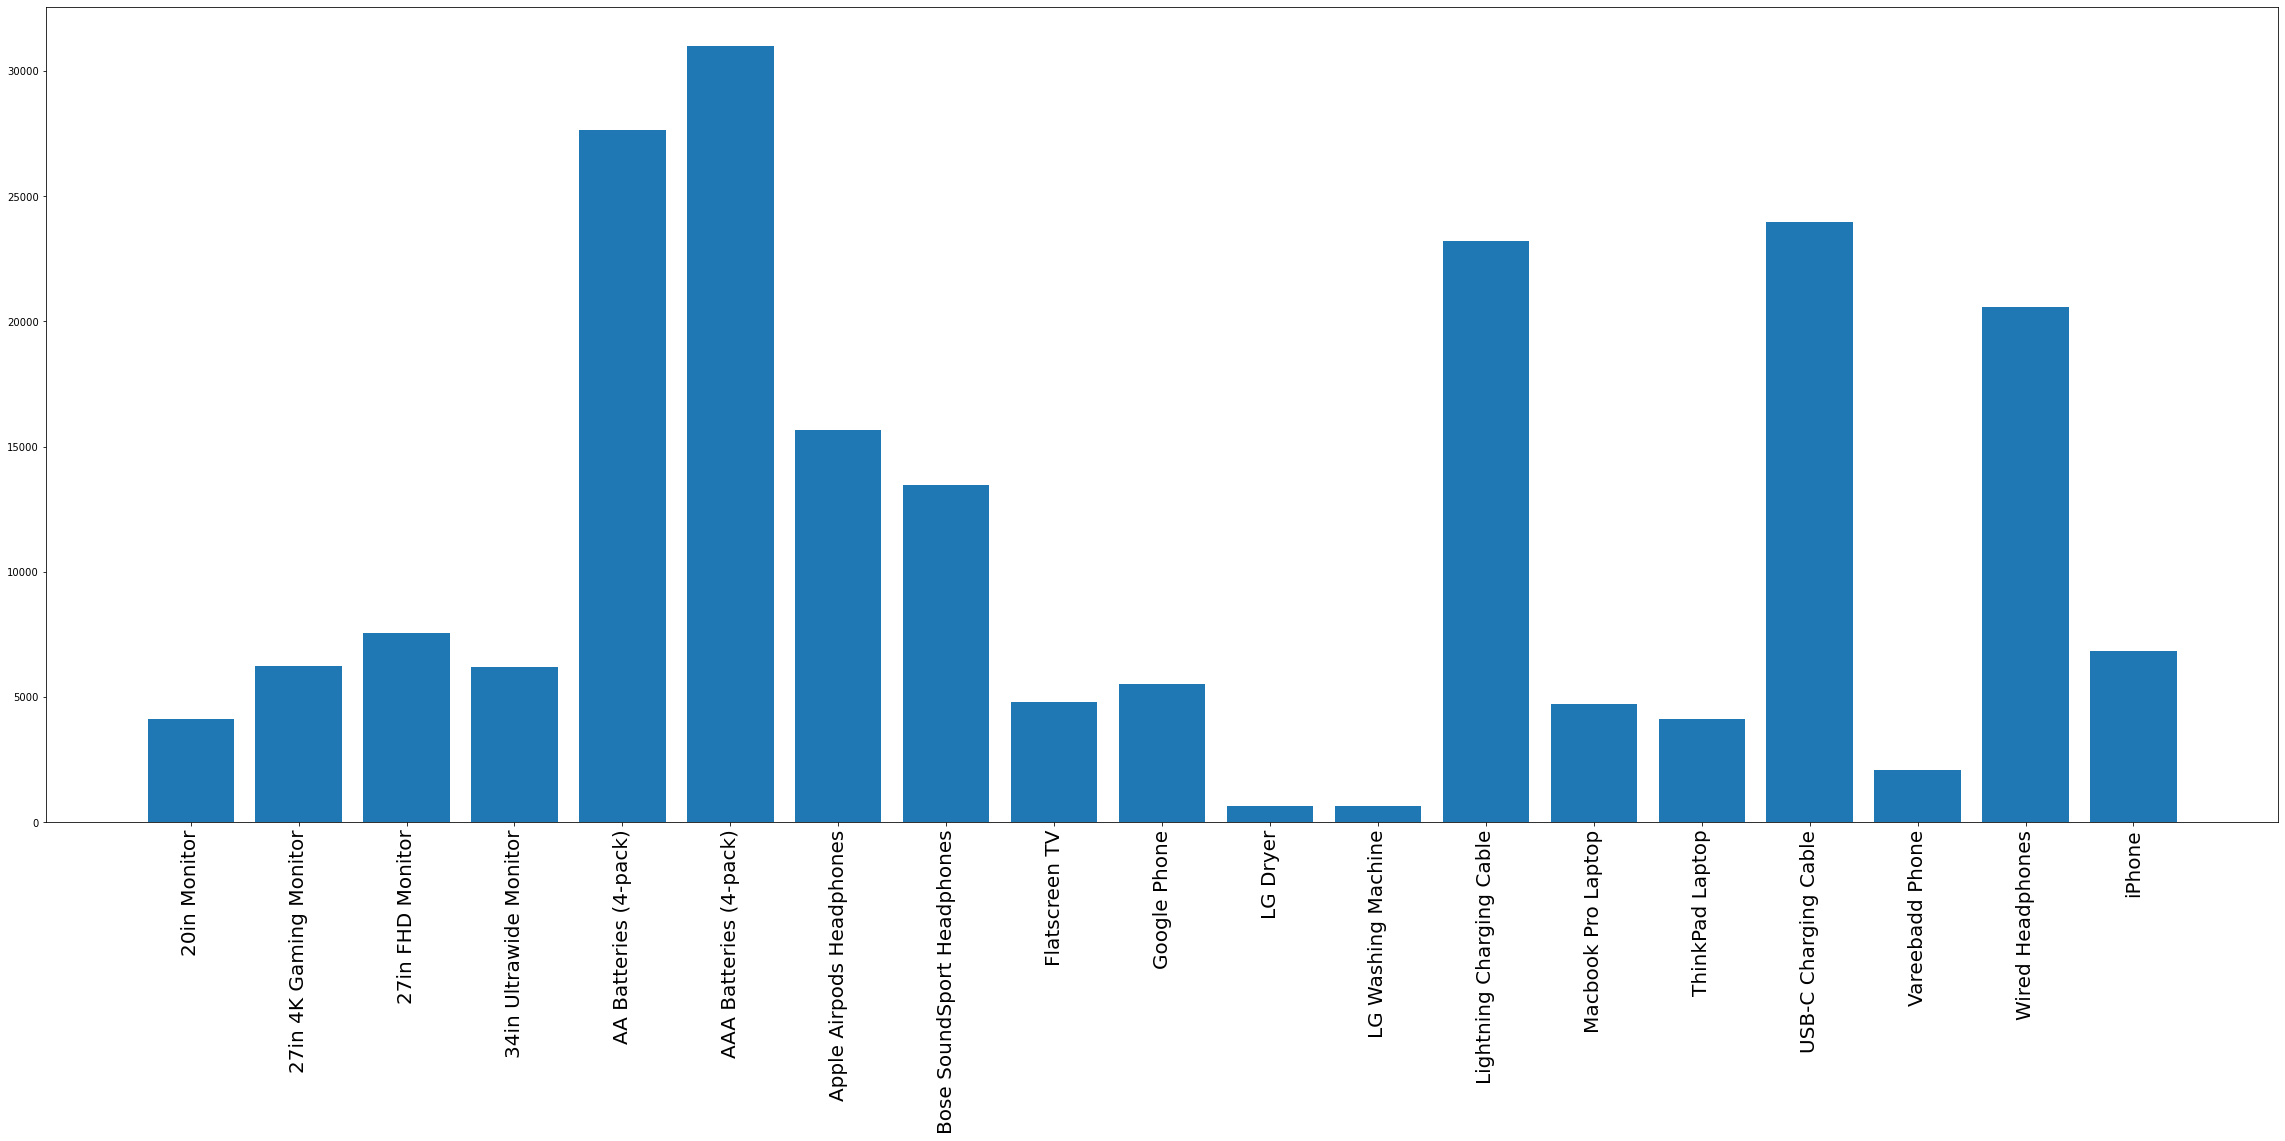

In [67]:
plt.bar(df_prod['Product'], df_prod['Quantity Ordered'])
plt.rcParams["figure.figsize"] = (40,15)
plt.xticks(rotation = 'vertical', fontsize = 20)
#In xticks, like fontsize, you can similarly use the following parameters - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html 

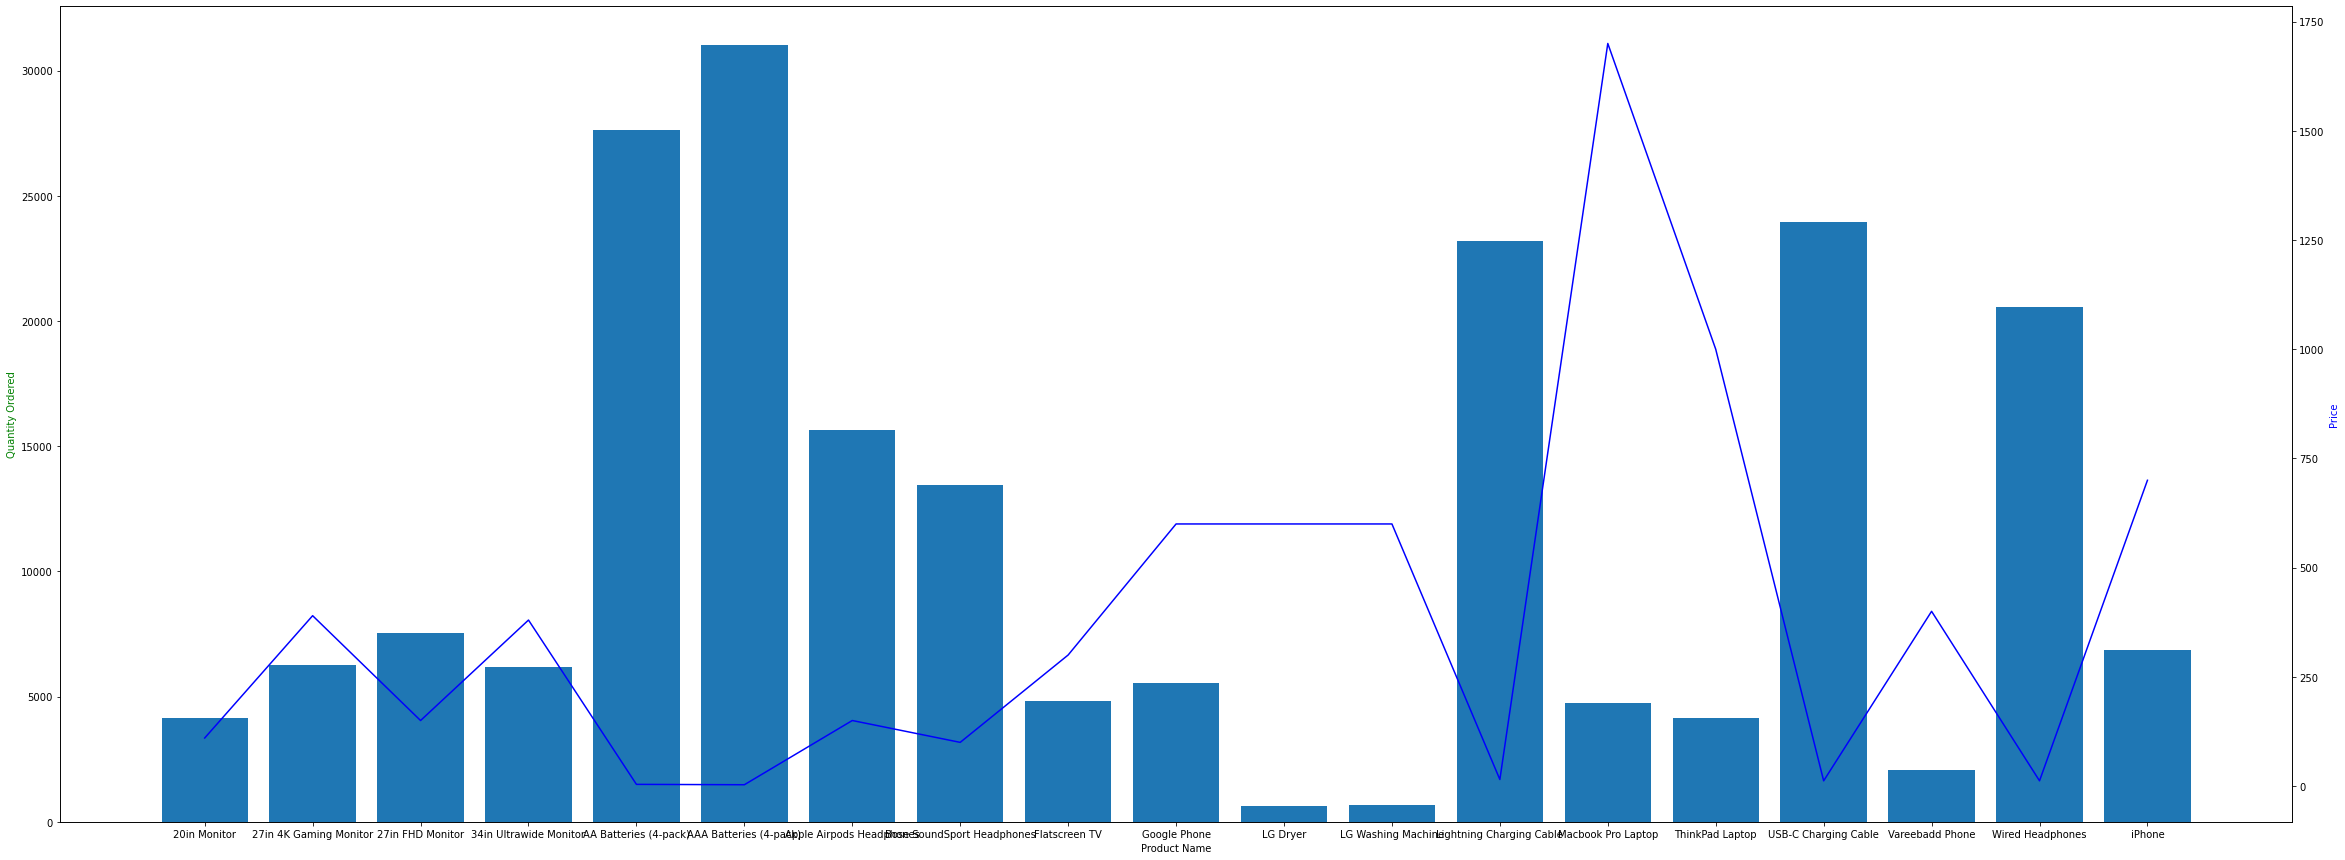

In [78]:
prices = all_data.groupby('Product')['Price Each'].mean()
quantity = all_data.groupby('Product')['Quantity Ordered'].sum()
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity)
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')

plt.show()

Clearly, there seems to be a correlation b/w the price of the product and the quantity sold. Let's confirm that by using .corr() function

In [79]:
df_corr = all_data[['Product','Quantity Ordered','Price Each']]

In [80]:
df_corr.groupby('Product')['Quantity Ordered'].sum()

,Product,Quantity Ordered,Price Each
0,USB-C Charging Cable,2.0,11.95
2,Bose SoundSport Headphones,1.0,99.99
3,Google Phone,1.0,600.00
4,Wired Headphones,1.0,11.99
5,Wired Headphones,1.0,11.99


In [83]:
df_corr['Quantity #'] = df_corr.groupby('Product')['Quantity Ordered'].transform('sum')

<ipython-input-83-0a5ba8bfb854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['Quantity #'] = df_corr.groupby('Product')['Quantity Ordered'].transform('sum')


In [87]:
df_corr.drop_duplicates(subset = ['Product','Quantity #'], keep = 'first')
df_corr

,Product,Quantity Ordered,Price Each,Quantity #
0,USB-C Charging Cable,2.0,11.95,23975.0
2,Bose SoundSport Headphones,1.0,99.99,13457.0
3,Google Phone,1.0,600.00,5532.0
4,Wired Headphones,1.0,11.99,20557.0
9,Macbook Pro Laptop,1.0,1700.00,4728.0
12,Lightning Charging Cable,1.0,14.95,23217.0
13,27in 4K Gaming Monitor,1.0,389.99,6244.0
14,AA Batteries (4-pack),1.0,3.84,27635.0
16,Apple Airpods Headphones,1.0,150.00,15661.0
20,AAA Batteries (4-pack),1.0,2.99,31017.0


In [99]:
df_corr['Quantity #'].corr(df_corr['Price Each'])
#Negative Correlation - As we saw from the earlier analysis (price decreases, quantity sold increases)

-0.6761196550827394